In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is inc

In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [4]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int

In [5]:
def add_node_one(state: AgentState) -> AgentState:
    """This node will add number 1 and number 2 integer values"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def substract_node_one(state: AgentState) -> AgentState:
    """This node will substract number 1 and number 2 integer values"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def router_one(state:AgentState) -> AgentState:
    """This node will decide what to do for the number 1 and number 2"""
    if state["operation1"] == "+":
        return "addition_operation_one"
    elif state["operation1"] == "-":
        return "substraction_operation_one"

def add_node_two(state: AgentState) -> AgentState:
    """This node will add number 3 and number 4 integers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def substract_node_two(state: AgentState) -> AgentState:
    """This node will substract number 3 and number 4"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def router_two(state: AgentState) -> AgentState:
    """This node will decide which operation to do for number 3 and number 4"""
    if state["operation2"] == "+":
        return "addition_operation_two"
    elif state["operation2"] == "-":
        return "substraction_operation_two"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("add_node_one", add_node_one)
graph.add_node("substract_node_one", substract_node_one)
graph.add_node("router_one", lambda state:state)
graph.add_node("add_node_two", add_node_two)
graph.add_node("substract_node_two", substract_node_two)
graph.add_node("router_two", lambda state:state)

graph.add_edge(START, "router_one")

graph.add_conditional_edges(
    "router_one",
    router_one,
    {
        "addition_operation_one": "add_node_one",
        "substraction_operation_one": "substract_node_one"
    }
)

graph.add_edge("add_node_one", "router_two")
graph.add_edge("substract_node_one", "router_two")

graph.add_conditional_edges(
    "router_two",
    router_two,
    {
        "addition_operation_two": "add_node_two",
        "substraction_operation_two": "substract_node_two"
    }
)

graph.add_edge("add_node_two", END)
graph.add_edge("substract_node_two", END)

app = graph.compile()

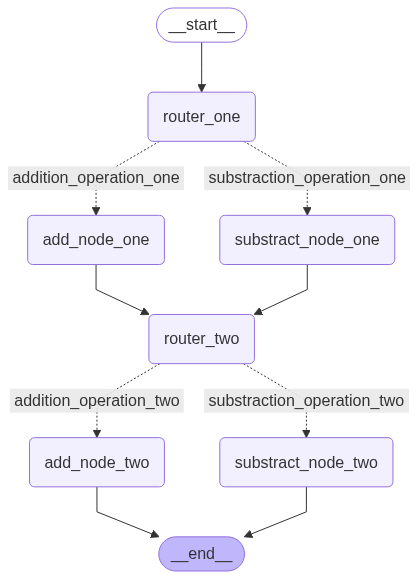

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state_1 = AgentState({"number1" : 10, "operation1" : "+", "number2" : 5, "number3": 7, "operation2": "-", "number4": 2 })

In [9]:
result = app.invoke(initial_state_1)
print(f"Final number 1: {result['finalNumber1']} and final number 2: {result['finalNumber2']}")

Final number 1: 15 and final number 2: 5
